# Syriatel Customer Churn

This notebook is the data cleaning and exploratory data analysis part for theproject. Please see the "insert link to other notebook here" to review the models implemented for the project.

### Authors

* Tony Bai
* Arthur Kim
* Eddie Lin
* Douglas Lu

## Overview

This is the first notebook where we clean and review the data. This data is then exported as a new CSV file for further analysis in another notebook as mentioned above.

## Business Problem

Our business is the SyriaTel company where we want to review the churn rate and how we can help the company reduce the churn by looking for factors that causes people to leave our business.

## Data Understanding

The dataset includes data of SyriaTel customer usage pattern and their churn status from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The data included ~3K customers with 21 columns.

Data includes:

The Target:
* churn

Features/Predictors:
* state
* account length
* area code
* phone number
* international plan
* voice mail plan
* number of voice mail messages
* total day minutes used
* day calls made
* total day charge
* total evening minutes
* total evening calls
* total evening charge
* total night minutes
* total night calls
* total night charge
* total international minutes used
* total international calls made
* total international charge
* number customer service calls made


## Import

Here we import the relevant libraries to clean and explore the dataset.

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.io import write_image

In [2]:
#NOTE: the following packages are necessary to run plotly.graph_objects go
#conda install psutil
#conda install -c plotly plotly-orca

## Reviewing the Data File

We first read in the data file to review the columns and entries.

In [3]:
#read in the file
df = pd.read_csv('data/syriatel_customer_churn.csv')

In [4]:
#review the first five entires in the dataset
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We see that the dataset has 3,333 rows and 21 columns with no null values. We also notice that there is a mix of data types. Our target 'churn' is a boolean data type which makes this a classification problem.

In [6]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Here we see that this data has a slight imbalance where there are far more people who do not churn compared to those who churn.

In [7]:
company_churn = round(483/(483+2850)*100,2)
company_churn

14.49

This data has a 14.49 churn rate, however based on secondary [research](https://www.fiercewireless.com/financial/verizon-counts-nearly-800k-net-wireless-phone-adds-q4), the churn rate of postpaid phones at some of the biggest mobile providers in the U.S. range from 0.8-2.1%, which is much lower than SyriaTel's churn rate. We plot these data side by side to get a clear picture of the difference.

In [1]:
#plot SyriaTel and other mobile provider churn rate in bar graph
X = ['SyriaTel', 'Verizon', 'T-Mobile', 'AT&T', 'Sprint']
y = [company_churn, 0.86, 1.01, 1.07, 2.06]

fig, ax = plt.subplots();
ax.bar(X, y, color='royalblue')
ax.set_title('Churn Rate of Mobile Operators')
ax.set_ylabel('Churn Rate (%)');

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    #height of the bar is also the value of the bar
    label_text = round(height,1)

    #add in the label of the text in the middle of the bar
    label_x = x + width / 2
    label_y = y + height+0.3
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize = 10)

#save the figure in the images folder
fig.savefig('images/Churn_Rate_of_Mobile_Operators.png', bbox_inches='tight')

NameError: name 'company_churn' is not defined

## Cleaning the Data

After reviewing the dataset, we already see some interesting columns and also certain aspects that need to be modified. The 'churn' column will be our target and because the data type is boolean, we need to convert the values into 0s and 1s. The number 1 refers to churn and number 0 refers to no churn. We also see that phone number is already split into the area code and the remaining seven numbers. For this project, we decided that the remaining seven numbers are irrelevant for the project. We also noticed that the column names have spaces, which we will have to replace with underscores.

In [9]:
#convert the target 'churn' to 0s and 1s
df['churn'] = df['churn'].astype(int)

In [10]:
#replace the space in column names with underscores
df.columns = df.columns.str.replace(' ','_')

In [11]:
#drop the phone number column as it is not relevant for our model
df.drop('phone_number', axis=1, inplace=True)

In [12]:
#review the changes made
df.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

We noticed that some of the numeric columns are similar to each other and can be summed to create new total columns. We created a total domestic minutes, calls, and charge columns that does not include international calls and separate total columns that include international calls. Charge per minute and the proportion of calls that are international may also play as factors for churn. We also created a customer call satisfaction column by taking the ratio of customer service calls to total calls, so that we can highlight customers who had a high volume of customer service calls relative to their total volume of calls. 

In [13]:
df['total_minutes_dom'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']

In [14]:
df['total_calls_dom'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

In [15]:
df['total_charge_dom'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [16]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']

In [17]:
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']

In [18]:
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [19]:
df["charge_per_min_day"] = df['total_day_charge']/df['total_day_calls']

In [20]:
df["charge_per_min_eve"] = df['total_eve_charge']/df['total_eve_calls']

In [21]:
df["charge_per_min_night"] = df['total_night_charge']/df['total_night_calls']

In [22]:
df["charge_per_min_dom"] = df['total_charge_dom']/df['total_calls_dom']

In [23]:
df["charge_per_min_int"] = df['total_intl_charge']/df['total_intl_calls']

In [24]:
df["%_int_min"]= df['total_intl_minutes']/ df['total_minutes']*100

In [25]:
df['call_satisfaction'] = df['customer_service_calls']/df['total_calls']*100

In [26]:
#review the changes made
df.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  ...  total_minutes  total_calls  \
0             45.07              197.4  ...          717.2          303   
1             27.47              195.5  ...          625.2          332   
2             41.38              121.2  ...          539.4          333   
3             50.90               61.9  ...          564.8          255   
4             28.34              148.3  ...          512.0          359   

   total_charge  charge_per_min_day  charge_per_min_eve  charge_per_min_night  \
0         75.56            0.409727            0.169495              0.120989   
1         59.24            0.223333            0.161359              0.111165   
2         62.29            0.362982            0.093636              0.070385   
3         66.80            0.716901            0.059773              0.099551   
4         52.09            0.250796            0.103361              0.069504   

   charge_per_min_dom  charge_per_min_int  %_int_min  call_satisfaction  
0            0.242867            0.900000   1.394311           0.330033  
1            0.168815            1.233333   2.191299           0.301205  
2            0.179878            0.658000   2.261772           0.000000  
3            0.262177            0.254286   1.168555           0.784314  
4            0.138652            0.910000   1.972656           0.835655  

[5 rows x 33 columns]

In [27]:
#check if there are any nulls in the new columns we made
df.isnull().sum()

state                      0
account_length             0
area_code                  0
international_plan         0
voice_mail_plan            0
number_vmail_messages      0
total_day_minutes          0
total_day_calls            0
total_day_charge           0
total_eve_minutes          0
total_eve_calls            0
total_eve_charge           0
total_night_minutes        0
total_night_calls          0
total_night_charge         0
total_intl_minutes         0
total_intl_calls           0
total_intl_charge          0
customer_service_calls     0
churn                      0
total_minutes_dom          0
total_calls_dom            0
total_charge_dom           0
total_minutes              0
total_calls                0
total_charge               0
charge_per_min_day         2
charge_per_min_eve         1
charge_per_min_night       0
charge_per_min_dom         0
charge_per_min_int        18
%_int_min                  0
call_satisfaction          0
dtype: int64

In [28]:
#checking to see if the nulls from charge_per_min_day is because total_day_calls is 0
df[df['charge_per_min_day'].isna()]['total_day_calls']

1345    0
1397    0
Name: total_day_calls, dtype: int64

In [29]:
#checking to see if the nulls from charge_per_min_eve is because total_eve_calls is 0
df[df['charge_per_min_eve'].isna()]['total_eve_calls']

2932    0
Name: total_eve_calls, dtype: int64

In [30]:
#checking to see if the nulls from charge_per_min_int is because total_intl_calls is 0
df[df['charge_per_min_int'].isna()]['total_intl_calls']

179     0
343     0
488     0
595     0
712     0
878     0
1028    0
1080    0
1400    0
1564    0
2345    0
2362    0
2513    0
2733    0
2906    0
2918    0
3275    0
3290    0
Name: total_intl_calls, dtype: int64

In [31]:
#we see that there are nulls in some of the charge_per_min columns, which is due to dividing by 0 
#because those customers made 0 of the type of calls, so we just fillna with 0
df['charge_per_min_int'].fillna(0, inplace=True)
df['charge_per_min_day'].fillna(0, inplace=True)
df['charge_per_min_eve'].fillna(0, inplace=True)

Thinking ahead of when we need to split out our categorical features, we decided to categorize the 'state' column into regions to see if we can identify regions with high churn. The matching of state to region was based on the [U.S. Census classification](data/us_regdiv.pdf).

In [32]:
#determine how many states are included in the file
df['state'].nunique()

51

In [33]:
#create a dictionary to match State with region
states = {
        'AK': 'West',
        'AL': 'South',
        'AR': 'South',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'Northeast',
        'DC': 'South',
        'DE': 'South',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'IA': 'Midwest',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'Northeast',
        'MD': 'South',
        'ME': 'Northeast',
        'MI': 'Midwest',
        'MN': 'Midwest',
        'MO': 'Midwest',
        'MS': 'South',
        'MT': 'West',
        'NC': 'South',
        'ND': 'Midwest',
        'NE': 'Midwest',
        'NH': 'Northeast',
        'NJ': 'Northeast',
        'NM': 'West',
        'NV': 'West',
        'NY': 'Northeast',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'Northeast',
        'RI': 'Northeast',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VT': 'Northeast',
        'WA': 'West',
        'WI': 'Midwest',
        'WV': 'South',
        'WY': 'West'
}

In [34]:
#create a new column for region
df['region'] = df['state'].replace(states)

In [35]:
#review the data again
df.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  ...  total_calls  total_charge  \
0             45.07              197.4  ...          303         75.56   
1             27.47              195.5  ...          332         59.24   
2             41.38              121.2  ...          333         62.29   
3             50.90               61.9  ...          255         66.80   
4             28.34              148.3  ...          359         52.09   

   charge_per_min_day  charge_per_min_eve  charge_per_min_night  \
0            0.409727            0.169495              0.120989   
1            0.223333            0.161359              0.111165   
2            0.362982            0.093636              0.070385   
3            0.716901            0.059773              0.099551   
4            0.250796            0.103361              0.069504   

   charge_per_min_dom  charge_per_min_int  %_int_min  call_satisfaction  \
0            0.242867            0.900000   1.394311           0.330033   
1            0.168815            1.233333   2.191299           0.301205   
2            0.179878            0.658000   2.261772           0.000000   
3            0.262177            0.254286   1.168555           0.784314   
4            0.138652            0.910000   1.972656           0.835655   

      region  
0    Midwest  
1    Midwest  
2  Northeast  
3    Midwest  
4      South  

[5 rows x 34 columns]

We export this data set with features to a new CSV for consistency across separate notebook for modeling analysis.

In [36]:
#export the the dataframes (one with State column, one without State column) to csv
df.to_csv("data/syrialtel_cleaned_data.csv" , index = False)

## Functions

The functions below are to create graphs of different features vs. the target (churn).

In [37]:
def box_plot_continuous(df_cont, target, feature):
    '''
    creates a boxplot of the feature by the target, and returns
    the figure and ax
    '''
    fig, ax = plt.subplots()
    my_pal = {0: "royalblue", 1: "skyblue"}
    sns.boxplot(x=df_cont[target], y=df_cont[feature],ax=ax, palette=my_pal);
    
    #set labels for axes, and the x and y tick size
    feature_label = feature.replace('_', ' ').title()
    ax.set_ylabel(feature_label, fontsize=18)
    ax.set_xlabel("")
    ax.set_xticklabels(['No Churn', 'Churn'])
    plt.xticks(size = 18)
    plt.yticks(size = 14)
    
    return fig, ax

In [38]:
def bar_continuous(df, target, feature, round_num=1):
    '''
    plots the median value of a feature by the target
    rounds the bar label to the round_num digits and returns
    the figure and ax
    '''
    fig, ax = plt.subplots()
    my_pal = {0: "royalblue", 1: "skyblue"}
    new_df = df[feature].groupby(by=df[target]).median()
    sns.barplot(y=new_df, x=new_df.index,ax=ax, palette=my_pal);
    fig.tight_layout()
    
    #set labels for axes, and the x and y tick size
    feature_label = feature.replace('_', ' ').title()
    ax.set_ylabel(feature_label, fontsize=18)
    ax.set_xlabel("")
    ax.set_xticklabels(['No Churn', 'Churn'])
    plt.xticks(size = 18)
    plt.yticks(size = 14)
    
    for bar in ax.patches:
        # The text annotation for each bar should be its height
        bar_value = bar.get_height()
        text = f'{round(bar_value, round_num):,}'
        # Get the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
        # set the text
        ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=10)
    
    return fig, ax

In [39]:
def stacked_bar_categorical(df_cat, target, feature):
    '''
    creates a stacked bar graph between the target (churn) and 
    a selected categorical feature and returns the figure and ax
    '''
    #create a new dataframe for the target and the feature of choice
    new_df = df_cat[[feature, target]]

    #create a stacked dataframe grouped by state and churn
    df_stacked = (new_df.groupby([feature, target])[feature].count()/new_df.groupby([feature])[feature].count())

    #unstack the dataframe
    df_unstacked = df_stacked.unstack()

    #multiply the proportions by 100 to get a percentage
    df_unstacked[0] = df_unstacked[0]*100
    df_unstacked[1] = df_unstacked[1]*100

    #rename the columns for 0 = no churn and 1 = churn
    df_unstacked.rename(columns={0:'No Churn', 1:"Churn"}, inplace=True)

    #create figure and ax
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.tight_layout()

    #sort the data by highest churn percentage and blot a stacked bar for top 10 states
    df_unstacked.sort_values(by="Churn", ascending=False)['Churn'].head(10).plot.bar(ax=ax, 
                                                                                     color=['royalblue']);

    #set labels for axes, and the x and y tick size
    ax.set_ylabel("Churn Rate(%)", fontsize=18)
    feature_label = feature.replace('_', ' ').title()
    ax.set_xlabel(feature_label, fontsize=18)
    plt.xticks(size = 14, rotation=0)
    plt.yticks(size = 14)
    
    #reverse the legend labels so that it matches with the bar graphs
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', prop={'size': 14})

    #add in the labels for each segment in the stacked bar
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        #height of the bar is also the value of the bar
        label_text = round(height,1)

        #add in the label of the text in the middle of the bar
        label_x = x + width / 2
        label_y = y + height + 0.4
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize = 14)
        
    return fig, ax

## Exploratory Data Analysis (EDA)

In the exploratory data analysis (EDA) portion, we explored the target (churn) and the features included in the dataset. We first plot the distribution of all features and churn in our model.

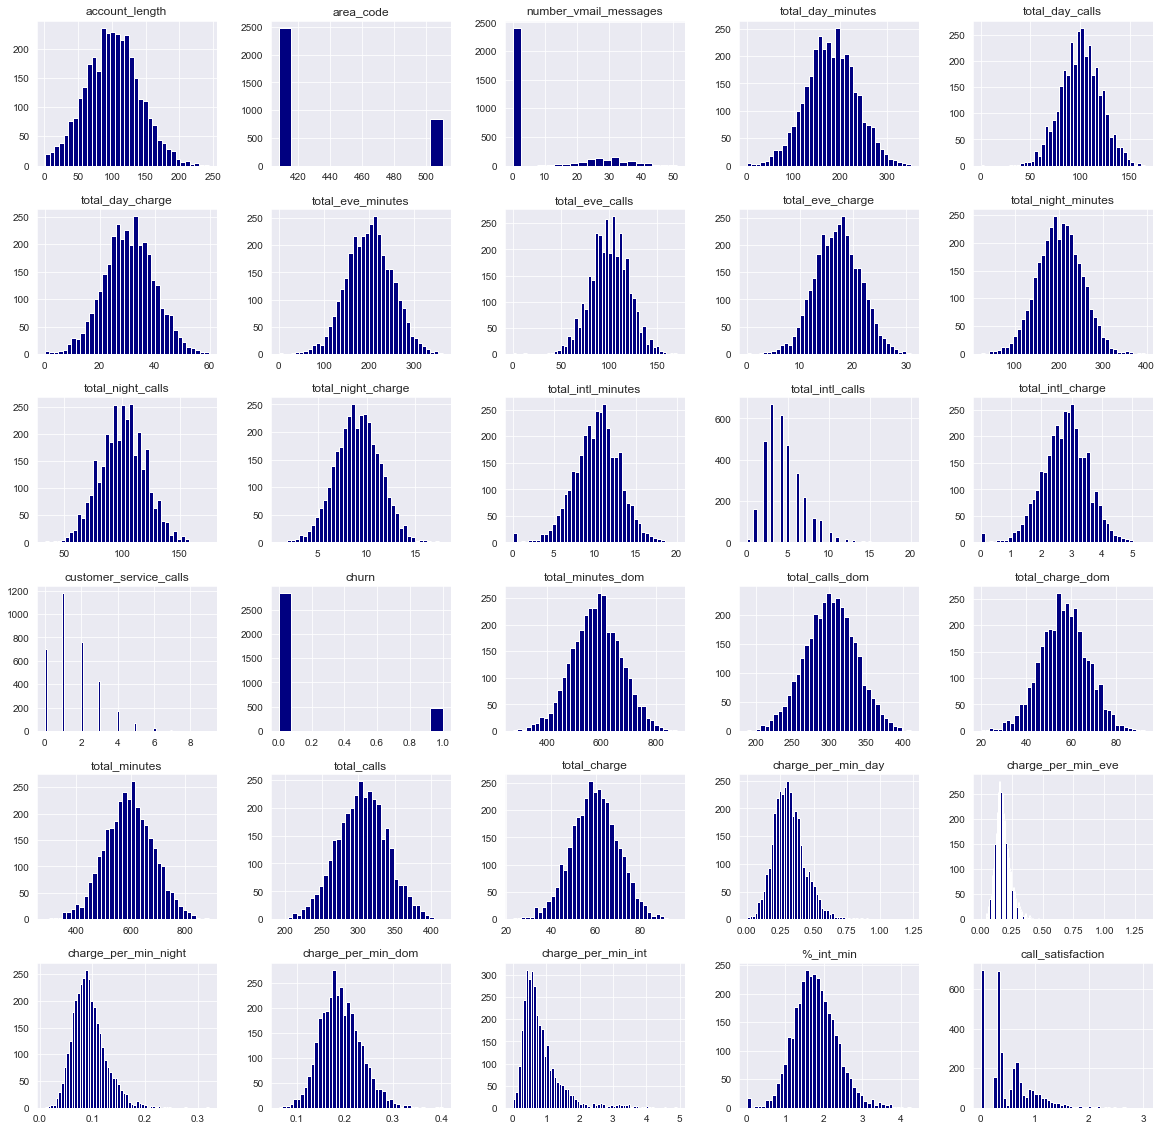

In [40]:
#plot histogram of all features and target in dataset
sns.set_style('dark')
df.hist(bins='auto',figsize=(20,20),color='navy');

We then split the continuous and categorical features so that we can analyze them against churn separately.

In [41]:
#create new dataframes with just continuous or categorical features and the target
df_cont = df.select_dtypes(include=np.number).drop('area_code', axis=1)
df_cat = df[['churn', 'area_code', 'international_plan', 'voice_mail_plan', 'state', 'region']]

### Continuous Features

In this section, we review the continuous features of the dataset vs. churn. 

In [42]:
#review the dataframe with continuous features
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

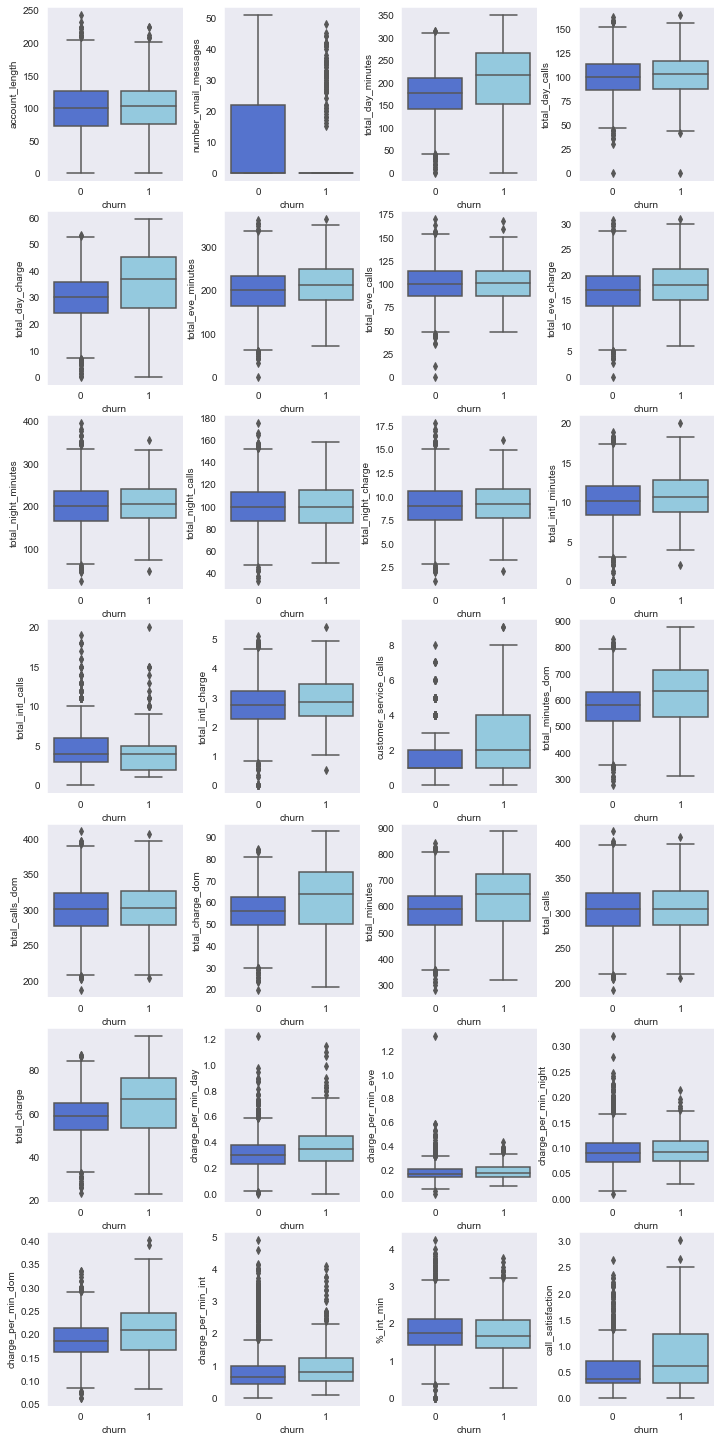

In [43]:
#plot out boxplots for each continuous features vs the target (churn) to see if any
#continuous features stand out in terms of difference between churn and no churn
fig, ax = plt.subplots(7, 4, figsize=(10, 20))
fig.tight_layout()
my_pal = {0: "royalblue", 1: "skyblue"}
for feature, subplot in zip(df_cont.drop('churn', axis=1).columns, ax.flatten()):
    sns.boxplot(x=df_cont['churn'], y=df_cont[feature],ax=subplot, palette=my_pal);

From the graphs above, we see some of the features where there is a noticeable difference between customers who churned vs those who did not churn. Some of the features include:
* total_day_minutes
* total_day_charge
* customer_service_calls
* total_minutes_dom
* total_charge_dom
* total_minutes
* charge_per_min_day
* charge_per_min_
* call_satisfaction

We individually plot some of the box plots above to get a closer look at some of the key features of interest.

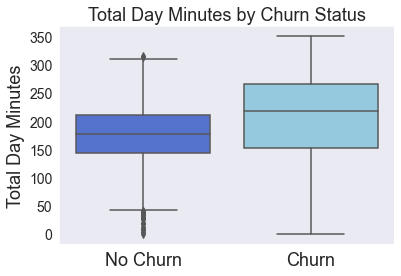

In [44]:
#create a box plot of total day minutes by customer churn
fig, ax = box_plot_continuous(df_cont, 'churn', 'total_day_minutes')
ax.set_title("Total Day Minutes by Churn Status", fontsize=18);
fig.savefig('images/Total_Day_Minutes_by_Churn_Status.png', bbox_inches='tight')

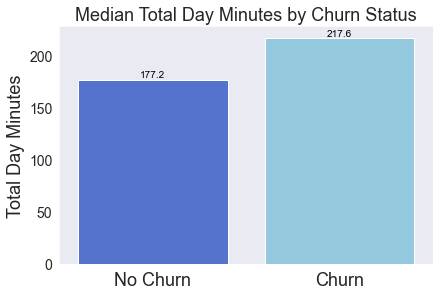

In [45]:
fig, ax = bar_continuous(df_cont, 'churn', 'total_day_minutes')
ax.set_title("Median Total Day Minutes by Churn Status", fontsize=18);
fig.savefig('images/Median_Total_Day_Minutes_by_Churn_Status.png', bbox_inches='tight')

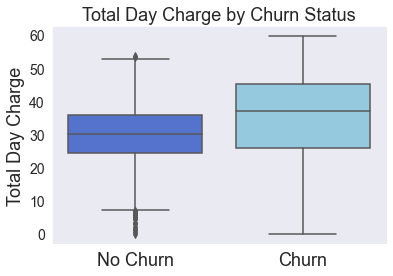

In [46]:
#create a box plot of total day charge by customer churn
fig, ax = box_plot_continuous(df_cont, 'churn', 'total_day_charge')
ax.set_title("Total Day Charge by Churn Status", fontsize=18);

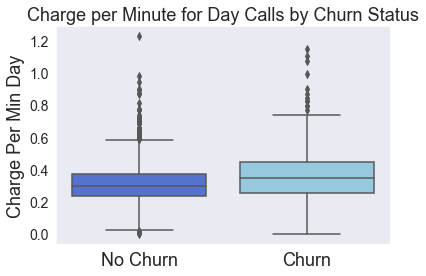

In [47]:
#create a box plot of charge per minute for day calls by customer churn
fig, ax = box_plot_continuous(df_cont, 'churn', 'charge_per_min_day')
ax.set_title("Charge per Minute for Day Calls by Churn Status", fontsize=18);

#save figure as an image
fig.savefig('images/Charge_per_Minute_for_Day_Calls_by_Churn_Status.png', bbox_inches='tight')

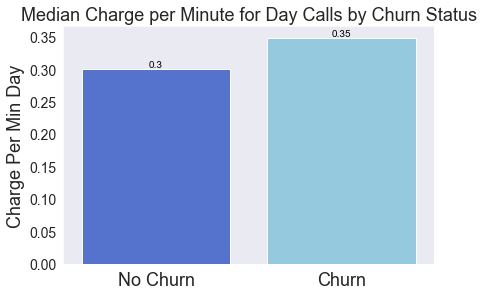

In [48]:
#create a bar graph of the median charge per minute for day calls by customer churn
fig, ax = bar_continuous(df_cont, 'churn', 'charge_per_min_day', round_num=2)
ax.set_title("Median Charge per Minute for Day Calls by Churn Status", fontsize=18);

#save figure as an image
fig.savefig('images/Median_Charge_per_Minute_for_Day_Calls_by_Churn_Status.png', bbox_inches='tight')

From the box plots and bar graphs regarding day calls above, we notice that those who churn have a high volume of day call minutes and charge per minute. This may mean that there is no fixed fee per minute, but rather variable pricing. We can plot the total number of minutes and charge per minute per day to see if there are any relations.

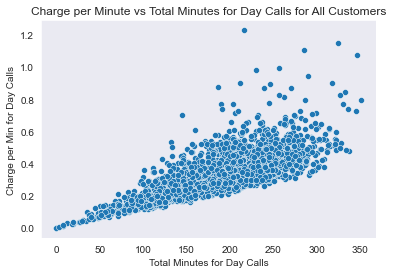

In [49]:
#plot the total day minutes by charge per min day for all customers
new_df = df
new_df = new_df[['churn', 'total_day_minutes', 'charge_per_min_day']]
#plot histogram of all features and target in dataset
sns.set_style('dark')
sns.scatterplot(x=new_df['total_day_minutes'], y=new_df['charge_per_min_day']);

#set title and axes labels
plt.title('Charge per Minute vs Total Minutes for Day Calls for All Customers');
plt.xlabel('Total Minutes for Day Calls');
plt.ylabel('Charge per Min for Day Calls');

#save figure as an image
plt.savefig('images/Charge_per_Minute_vs_Total_Minutes_for_Day_Calls_for_All_Customers.png', bbox_inches='tight')

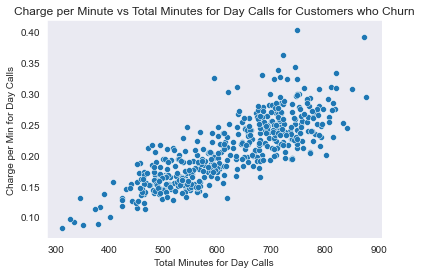

In [50]:
#plot the total day minutes by charge per min day for customers who churn
new_df = df[df['churn'] == 1]
new_df = new_df[['churn', 'total_minutes_dom', 'charge_per_min_dom']]
#plot histogram of all features and target in dataset
sns.set_style('dark')
sns.scatterplot(x=new_df['total_minutes_dom'], y=new_df['charge_per_min_dom']);
#set title and axes labels
plt.title('Charge per Minute vs Total Minutes for Day Calls for Customers who Churn');
plt.xlabel('Total Minutes for Day Calls');
plt.ylabel('Charge per Min for Day Calls');

#save figure as an image
plt.savefig('images/Charge_per_Minute_vs_Total_Minutes_for_Day_Calls_for_Customers_who_Churn.png', bbox_inches='tight')

From the scatterplots above, we see a positive correlation between total minutes and charge per minute for day calls. This shows that a potential solution for the company is to implement a fixed fee charge per minute or perhaps at a certain minutes threshold, the price becomes fixed.

Similarly, the data on evening calls also show some difference between customers who churn and those who do not.

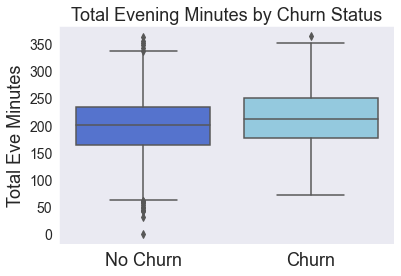

In [51]:
#create a box plot of total day minutes by customer churn
fig, ax = box_plot_continuous(df_cont, 'churn', 'total_eve_minutes')
ax.set_title("Total Evening Minutes by Churn Status", fontsize=18);
fig.savefig('images/Total_Eve_Minutes_by_Churn_Status.png', bbox_inches='tight')

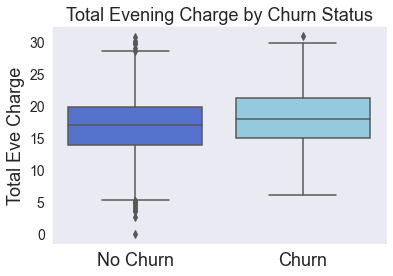

In [52]:
#create a box plot of total day charge by customer churn
fig, ax = box_plot_continuous(df_cont, 'churn', 'total_eve_charge')
ax.set_title("Total Evening Charge by Churn Status", fontsize=18);

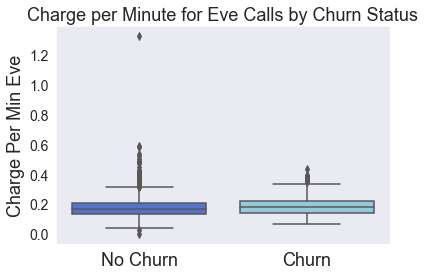

In [53]:
#create a box plot of charge per minute for day calls by customer churn
fig, ax = box_plot_continuous(df_cont, 'churn', 'charge_per_min_eve')
ax.set_title("Charge per Minute for Eve Calls by Churn Status", fontsize=18);

#save figure as an image
fig.savefig('images/Charge_per_Minute_for_Evening_Calls_by_Churn_Status.png', bbox_inches='tight')

From the box plots regarding day calls above, we notice that those who churn have a high volume of day call minutes and charge per minute. This may mean that there is no fixed fee per minute, but rather variable pricing. We can plot the total number of minutes and charge per minute per day to see if there are any relations.

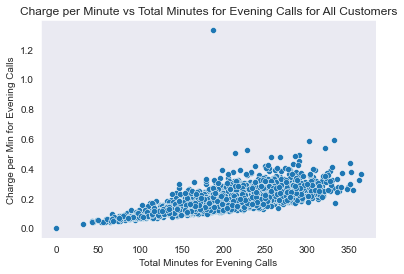

In [54]:
#plot the total day minutes by charge per min day for all customers
new_df = df
new_df = new_df[['churn', 'total_eve_minutes', 'charge_per_min_eve']]
#plot histogram of all features and target in dataset
sns.set_style('dark')
sns.scatterplot(x=new_df['total_eve_minutes'], y=new_df['charge_per_min_eve']);

#set title and axes labels
plt.title('Charge per Minute vs Total Minutes for Evening Calls for All Customers');
plt.xlabel('Total Minutes for Evening Calls');
plt.ylabel('Charge per Min for Evening Calls');

#save figure as an image
plt.savefig('images/Charge_per_Minute_vs_Total_Minutes_for_Evening_Calls_for_All_Customers.png', bbox_inches='tight')

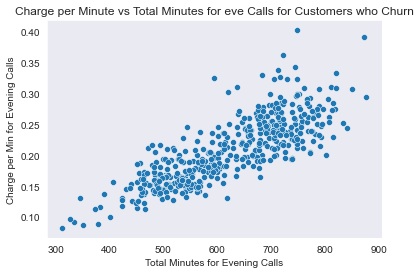

In [55]:
#plot the total eve minutes by charge per min eve for customers who churn
new_df = df[df['churn'] == 1]
new_df = new_df[['churn', 'total_minutes_dom', 'charge_per_min_dom']]
#plot histogram of all features and target in dataset
sns.set_style('dark')
sns.scatterplot(x=new_df['total_minutes_dom'], y=new_df['charge_per_min_dom']);
#set title and axes labels
plt.title('Charge per Minute vs Total Minutes for eve Calls for Customers who Churn');
plt.xlabel('Total Minutes for Evening Calls');
plt.ylabel('Charge per Min for Evening Calls');

#save figure as an image
plt.savefig('images/Charge_per_Minute_vs_Total_Minutes_for_Evening_Calls_for_Customers_who_Churn.png', bbox_inches='tight')

We also noticed that customer satisfaction or the proportion of customer service calls to total calls differed between the two classes. 

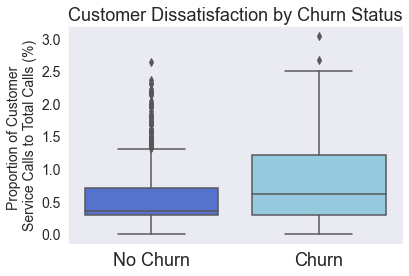

In [56]:
#create a box plot of charge per minute for day calls by customer churn
fig, ax = box_plot_continuous(df_cont, 'churn', 'call_satisfaction')
ax.set_title("Customer Dissatisfaction by Churn Status", fontsize=18);
ax.set_ylabel("Proportion of Customer "
              "\n"
              "Service Calls to Total Calls (%)",fontsize=14)

#save figure as an image
fig.savefig('images/Customer_Satisfaction_by_Churn_Status.png', bbox_inches='tight')

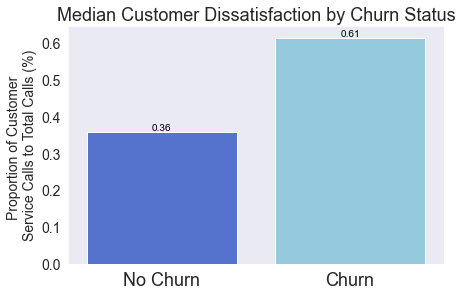

In [57]:
#create a bar graph of the median charge per minute for day calls by customer churn
fig, ax = bar_continuous(df_cont, 'churn', 'call_satisfaction', round_num=2)
ax.set_title("Median Customer Dissatisfaction by Churn Status", fontsize=18);
ax.set_ylabel("Proportion of Customer "
              "\n"
              "Service Calls to Total Calls (%)",fontsize=14)

#save figure as an image
fig.savefig('images/Median_Customer_Satisfaction_by_Churn_Status.png', bbox_inches='tight')

### Categorical Features

In this section, we review the categorical features of the dataset vs. churn. 

In [58]:
#review the dataframe with categorical features
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   churn               3333 non-null   int64 
 1   area_code           3333 non-null   int64 
 2   international_plan  3333 non-null   object
 3   voice_mail_plan     3333 non-null   object
 4   state               3333 non-null   object
 5   region              3333 non-null   object
dtypes: int64(2), object(4)
memory usage: 156.4+ KB


We use a function to graph a stacked bar of each category in the feature, and each bar segment represents proportion of customers that churn or do not churn within that category.

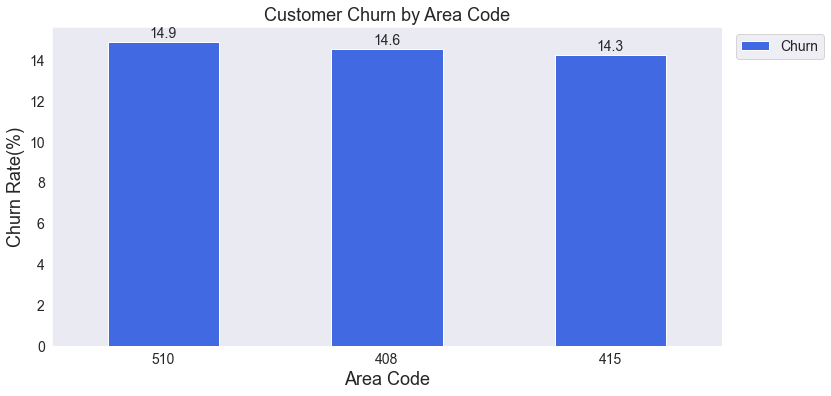

In [59]:
#plot bar graph for churn by area code
fig, ax = stacked_bar_categorical(df_cat, 'churn', 'area_code')
ax.set_title("Customer Churn by Area Code", fontsize=18);

We see that churn is not very different among the different area codes.

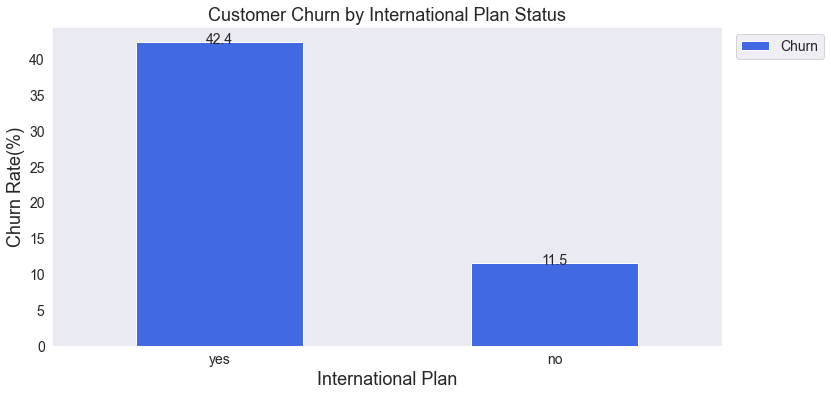

In [60]:
#plot bar graph for churn by international plan status
fig, ax = stacked_bar_categorical(df_cat, 'churn', 'international_plan')
ax.set_title("Customer Churn by International Plan Status", fontsize=18);
fig.savefig('images/Customer_Churn_by_International_Plan_Status.png', bbox_inches='tight')

We analyzed the international plan to see if there was a relationship between the length of the account to the amount of international call. Our original hypothesis is that those with an international plan would have a shorter account length time because they were only temporarily staying in the US. However, from the two graphs below, we see that the two had a fairly similar distribution.

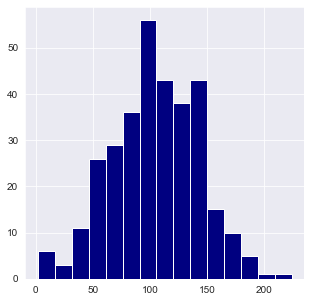

In [61]:
#plot histogram of account length of customers with international plan
new_df = df[df['international_plan'] == 'yes']['account_length']
new_df.hist(bins='auto',figsize=(5,5),color='navy');

In [2]:
#plot histogram of account length of customers without international plan
new_df2 = df[df['international_plan'] == 'no']['account_length']
new_df2.hist(bins='auto',figsize=(5,5),color='navy');

NameError: name 'df' is not defined

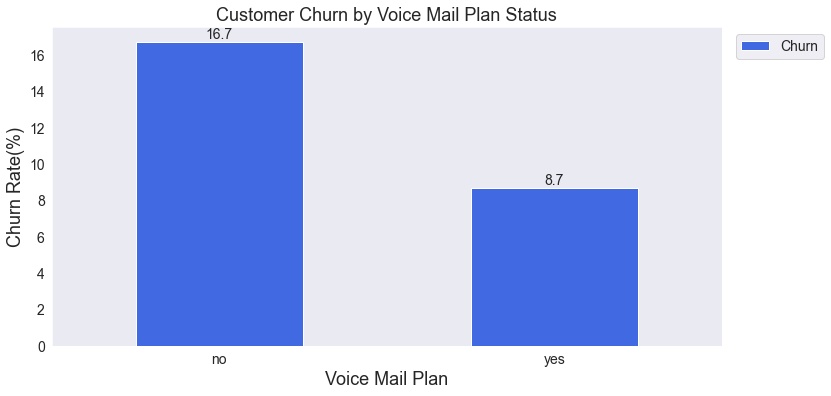

In [63]:
#plot bar graph for churn by voicemail plan status
fig, ax = stacked_bar_categorical(df_cat, 'churn', 'voice_mail_plan')
ax.set_title("Customer Churn by Voice Mail Plan Status", fontsize=18);

In [64]:
#create a new dataframe that only includes the column churn and state
state_count1=df[['state','churn']]

#create a new dataframe that calculates the churn per state
state_churn=state_count1[state_count1['churn']== 1].groupby('state',as_index = False).count()
state_count2=df[['state','churn']].groupby('state',as_index = False).count()
state_count2.rename(columns={"churn":"total_cust"},inplace=True)
state_churn['total_cust']=state_count2['total_cust']
state_churn['%churn']=(state_churn['churn']/state_count2['total_cust'])*100

In [65]:
#psutil and plotly plotly-orca packages are necessary to run this block of code

fig = go.Figure(data=go.Choropleth(
    locations=state_churn['state'], # Spatial coordinates
    z = state_churn['%churn'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Churn Percentage (%)",
))
fig.update_layout(
    title_text = 'Customer Churn by State',
    geo_scope='usa', # limit map scope to US
)
fig.show()

#save image
write_image(fig=fig, file="images/churn_by_state_heatmap.png", format='png')

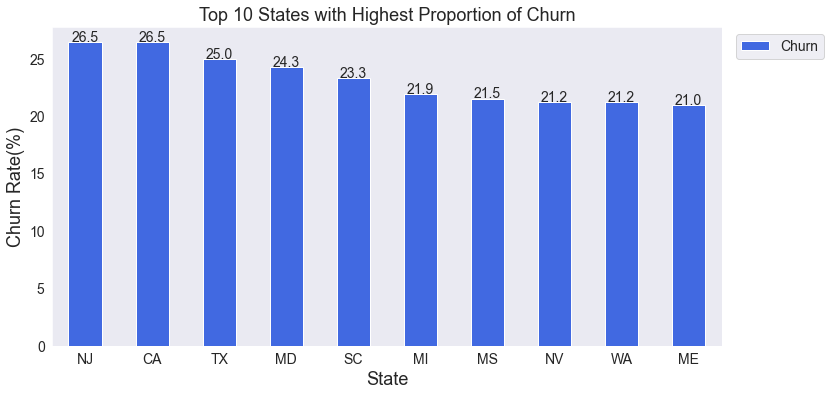

In [66]:
#plot bar graph for churn by top 10 states
fig, ax = stacked_bar_categorical(df_cat, 'churn', 'state')
ax.set_title("Top 10 States with Highest Proportion of Churn", fontsize=18);
fig.savefig('images/Top_10_States_with_Highest_Proportion_of_Churn.png', bbox_inches='tight')

From the graph, the top 5 states have a churn rate of over 23% while the other 5 have about 21%

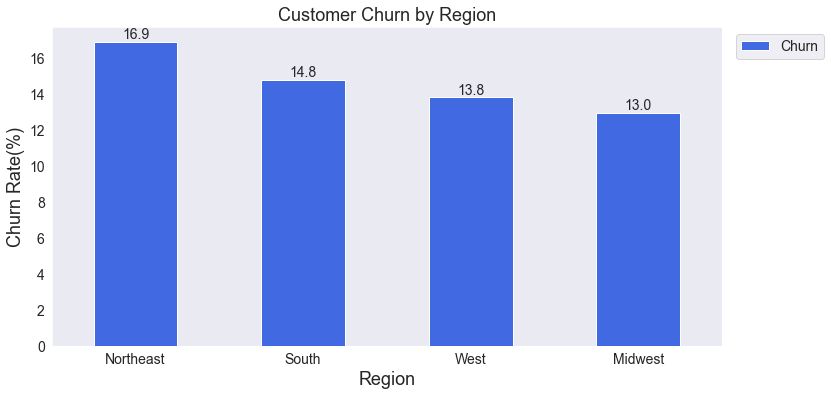

In [67]:
#plot bar graph for churn by region
fig, ax = stacked_bar_categorical(df_cat, 'churn', 'region')
ax.set_title("Customer Churn by Region", fontsize=18);

Here we show the churn rate based on region. From the graph, we see that the Northeast has the highest churn rate while the Midwest had the fewest.